In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
# from sklearn import preprocessing

In [2]:
boston = pd.read_csv('housing_boston.csv', delimiter=r'\s+')

# Understanding the data

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. **CRIM** - Tingkat kejahatan per kapita berdasarkan kota.  
2. **ZN** - Proporsi lahan hunian yang diatur untuk lot lebih dari 25.000 kaki persegi.  
3. **INDUS** - Proporsi luas lahan bisnis non-ritel per kota.  
4. **CHAS** - Variabel dummy untuk Sungai Charles (1 jika wilayah berbatasan dengan sungai; 0 jika tidak).  
5. **NOX** - Konsentrasi nitrogen oksida (bagian per 10 juta).  
6. **RM** - Rata-rata jumlah kamar per unit hunian.  
7. **AGE** - Proporsi unit hunian yang dimiliki dan dibangun sebelum tahun 1940.  
8. **DIS** - Jarak berbobot ke lima pusat pekerjaan di Boston.  
9. **RAD** - Indeks aksesibilitas ke jalan raya radial.  
10. **TAX** - Tingkat pajak properti dengan nilai penuh per $10.000.  
11. **PTRATIO** - Rasio siswa-guru per kota.  
12. **B** - 1000(Bk - 0,63)^2, di mana Bk adalah proporsi penduduk kulit hitam per kota.  
13. **LSTAT** - Persentase populasi berstatus ekonomi rendah.  
14. **MEDV** - Nilai tengah dari harga rumah yang dimiliki ($1000).  

In [4]:
boston.rename(columns={'CRIM': 'Tingkat_kejahatan', 'ZN': 'Lahan_hunian_iot', 'INDUS': 'Lahan_bisnis_non_ritel', 'CHAS': 'Berbatasan_dg_sungai',
                       'NOX': 'Konsentrasi_NiOk', 'RM': 'Jumlah_kamar', 'DIS': 'Jarak_ke_pusat_pekerjaan', 'RAD': 'Indeks_akses_ke_jalan_raya',
                       'PTRATIO': 'Rasio_siswa_guru', 'B': 'Proposi_kulit_hitam', 'LSTAT': 'Persentase_ekonomi_rendah', 'MEDV': 'Median_harga_rumah'}, inplace=True)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tingkat_kejahatan           506 non-null    float64
 1   Lahan_hunian_iot            506 non-null    float64
 2   Lahan_bisnis_non_ritel      506 non-null    float64
 3   Berbatasan_dg_sungai        506 non-null    int64  
 4   Konsentrasi_NiOk            506 non-null    float64
 5   Jumlah_kamar                506 non-null    float64
 6   AGE                         506 non-null    float64
 7   Jarak_ke_pusat_pekerjaan    506 non-null    float64
 8   Indeks_akses_ke_jalan_raya  506 non-null    int64  
 9   TAX                         506 non-null    float64
 10  Rasio_siswa_guru            506 non-null    float64
 11  Proposi_kulit_hitam         506 non-null    float64
 12  Persentase_ekonomi_rendah   506 non-null    float64
 13  Median_harga_rumah          506 non

Dari informasi di atas, menurut kami tipe data tiap kolomnya sudah sesuai

# EDA(Exploratory Data Analysis)

In [6]:
boston.describe()

,Tingkat_kejahatan,Lahan_hunian_iot,Lahan_bisnis_non_ritel,Berbatasan_dg_sungai,Konsentrasi_NiOk,Jumlah_kamar,AGE,Jarak_ke_pusat_pekerjaan,Indeks_akses_ke_jalan_raya,TAX,Rasio_siswa_guru,Proposi_kulit_hitam,Persentase_ekonomi_rendah,Median_harga_rumah
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.isnull().sum()

Tingkat_kejahatan             0
Lahan_hunian_iot              0
Lahan_bisnis_non_ritel        0
Berbatasan_dg_sungai          0
Konsentrasi_NiOk              0
Jumlah_kamar                  0
AGE                           0
Jarak_ke_pusat_pekerjaan      0
Indeks_akses_ke_jalan_raya    0
TAX                           0
Rasio_siswa_guru              0
Proposi_kulit_hitam           0
Persentase_ekonomi_rendah     0
Median_harga_rumah            0
dtype: int64

Dari informasi di atas, kita mengetahui bahwa tidak terdapat missing value

In [8]:
boston.duplicated().sum()

0

Dari informasi di atas, kita mengetahui bahwa tidak terdapat duplicate value

Pengecekan outlier dengan boxplot

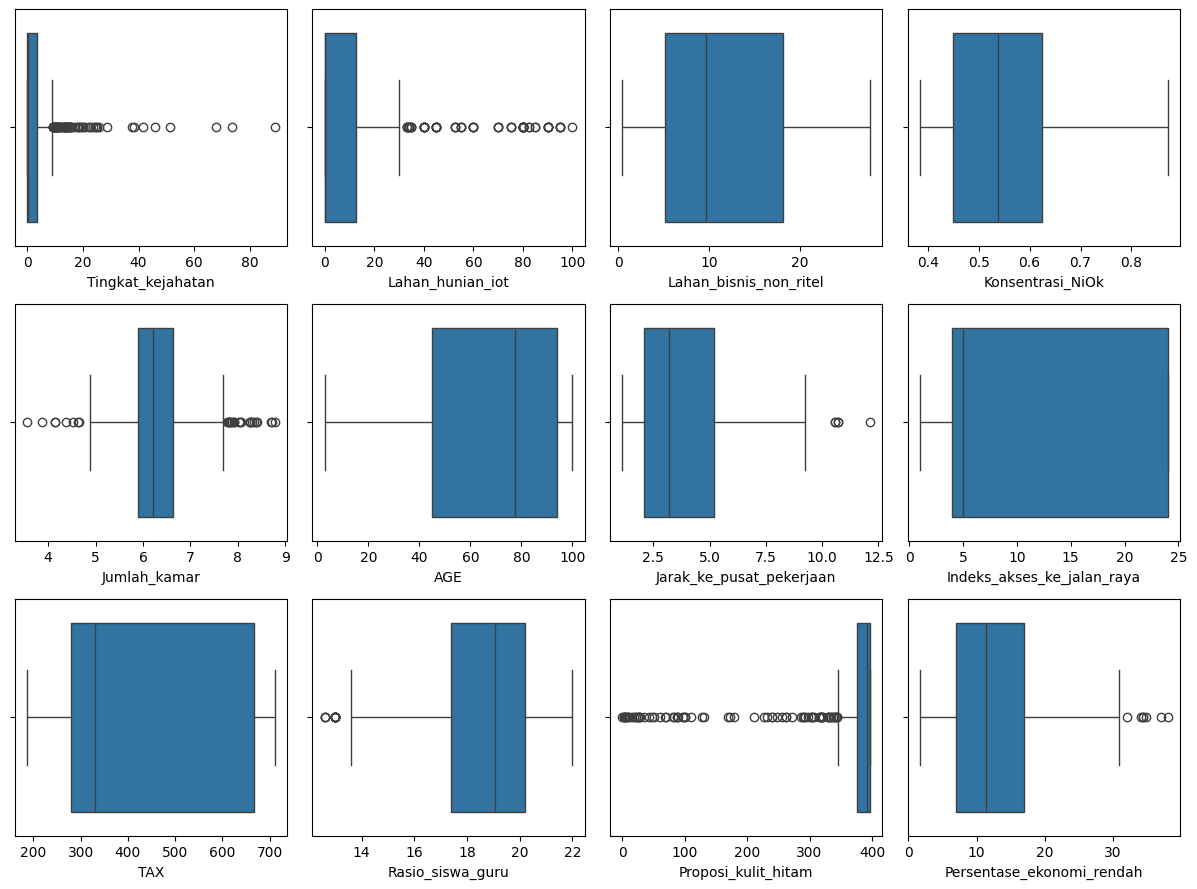

In [9]:
check_outlier = boston.copy()

check_outlier = check_outlier.drop("Berbatasan_dg_sungai", axis=1)
check_outlier = check_outlier.drop("Median_harga_rumah", axis=1)

plt.figure(figsize=(12, 9))

for i, column in enumerate(check_outlier.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data = check_outlier, x = column)

plt.tight_layout()
plt.show()

Kami menghapus kolom `CHAS` atau `Berbatasan_dg_sungai` dan `MEDV` atau `Median_harga_rumah` dari pengecekan outlier karena dari pengecekan describe, menurut kami keduanya memiliki batas nilai yang wajar. Dari visualisasi di atas, terlihat bahwa beberapa variabel seperti Tingkat_kejahatan, Lahan_hunian_iot, Jumlah_kamar, dan Proporsi_kulit_hitam memiliki outlier yang cukup banyak

In [10]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

outliers = (boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))
outliers = outliers.drop(columns=['Berbatasan_dg_sungai'])
outliers = outliers.drop(columns=['Median_harga_rumah'])

total_outlier = outliers.sum().sum()
print(outliers.sum())
print(f"\nTotal outlier: {total_outlier}")

Tingkat_kejahatan             66
Lahan_hunian_iot              68
Lahan_bisnis_non_ritel         0
Konsentrasi_NiOk               0
Jumlah_kamar                  30
AGE                            0
Jarak_ke_pusat_pekerjaan       5
Indeks_akses_ke_jalan_raya     0
TAX                            0
Rasio_siswa_guru              15
Proposi_kulit_hitam           77
Persentase_ekonomi_rendah      7
dtype: int64

Total outlier: 268


Hasil pengecekan outlier menggunakan IQR (Interquartile Range) menunjukkan bahwa lebih dari 50% data dalam dataset ini terdeteksi sebagai outlier

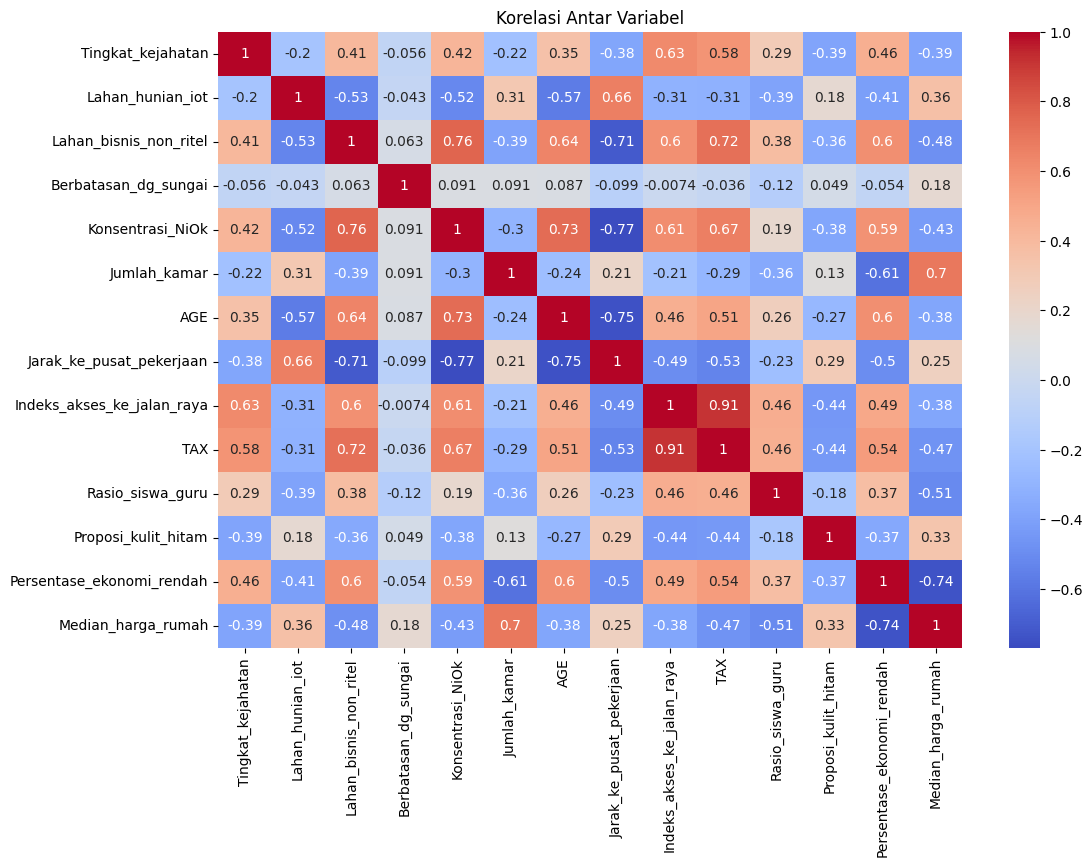

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

Dari heatmap di atas, terlihat bahwa variabel `jumlah_kamar` memiliki hubungan yang paling kuat (positif) terhadap harga rumah, dan variabel `Persentase_ekonomi_rendah` memiliki hubungan yang paling kuat (negatif) terhadap harga rumah

Selain itu, kita dapat melihat bahwa variabel `Berbatasan_dg_sungai` memiliki hubungan yang sangat kecil terhadap target maupun terhadap variabel2 lainnya yang berarti hampir tidak berpengaruh terhadap target, sehingga kami memutuskan untuk menghapus saja kolom tersebut dari dataframe

In [12]:
boston.drop('Berbatasan_dg_sungai', axis=1, inplace=True)

# Data Visualization

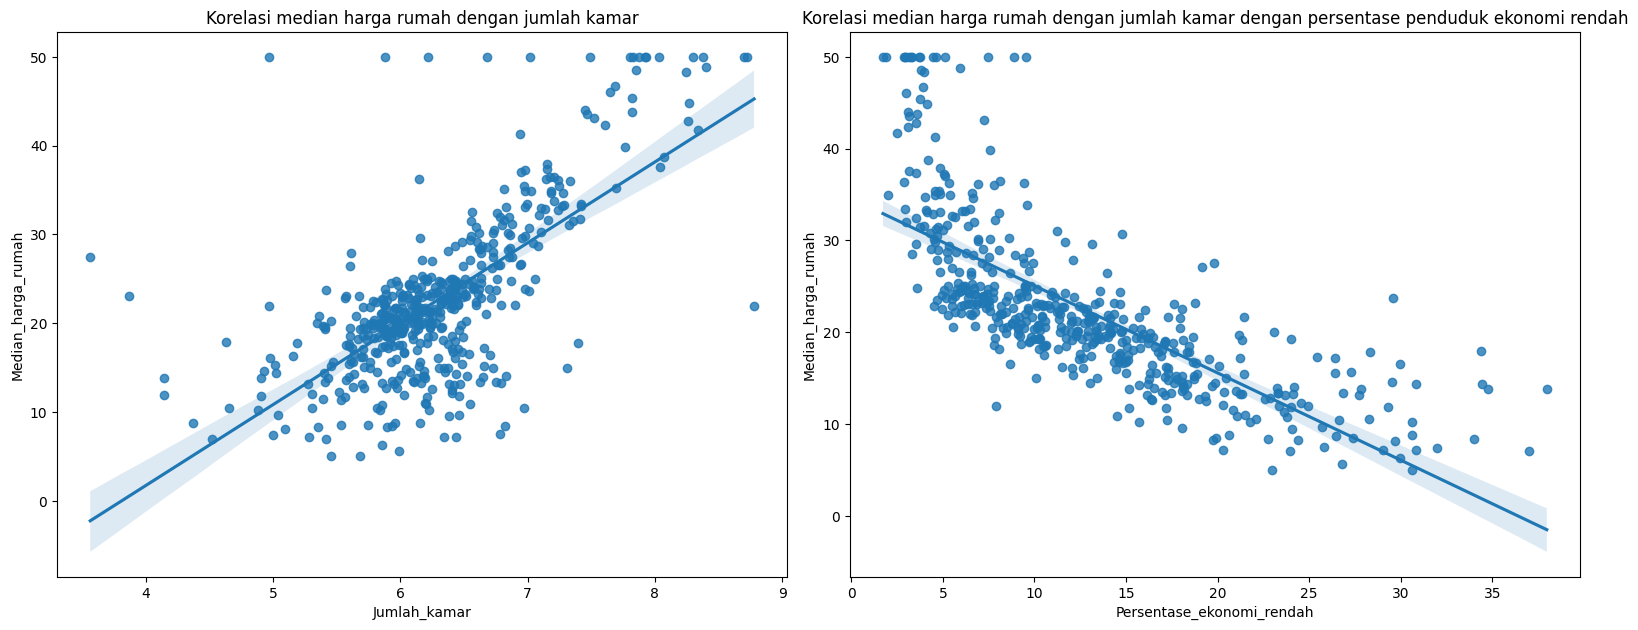

In [13]:
plt.figure(figsize=(16, 12))

# korelasi median harga rumah dengan jumlah kamar
plt.subplot(2, 2, 1)
sns.regplot(x="Jumlah_kamar", y="Median_harga_rumah", data=boston, fit_reg=True)
plt.title("Korelasi median harga rumah dengan jumlah kamar")

# korelasi median harga rumah dengan persentase penduduk ekonomi rendah
plt.subplot(2, 2, 2)
sns.regplot(x="Persentase_ekonomi_rendah", y="Median_harga_rumah", data=boston, fit_reg=True)
plt.title("Korelasi median harga rumah dengan jumlah kamar dengan persentase penduduk ekonomi rendah")

plt.tight_layout()
plt.show()

Hasilnya adalah:

1.korelasi MEDV dengan Jumlah Kamar (RM)
grafik menunjukkan korelasi positif yang cukup kuat antara jumlah kamar (RM) dan harga rumah (MEDV). semakin banyak jumlah kamar di suatu rumah, semakin tinggi harga median rumah tersebut.

2.korelasi MEDV dengan Persentase Penduduk dengan Status Sosial Ekonomi Rendah (LSTAT)
terdapat korelasi negatif yang signifikan antara LSTAT dan MEDV. semakin tinggi persentase penduduk berstatus sosial ekonomi rendah di suatu daerah, semakin rendah harga median rumah. ini menunjukkan bahwa wilayah dengan penduduk berpenghasilan rendah cenderung memiliki nilai properti yang lebih rendah.

# Data Modelling

### Data Preparation

#### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X = boston.drop('Median_harga_rumah', axis=1)
Y = boston['Median_harga_rumah']

#### Standarisasi

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
Y_scaled_df = pd.DataFrame(Y_scaled, columns=['Median_harga_rumah'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y_scaled_df, test_size=0.2, random_state=42)

### Modelling

#### XGBoost

In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42) 
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [19]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost model Evaluation:")
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R2:", xgb_r2)

XGBoost model Evaluation:
RMSE: 0.29286028261398783
MAE: 0.20187621139440828
R2: 0.9012675466495615


#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest model Evaluation:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

Random Forest model Evaluation:
RMSE: 0.32017859980281305
MAE: 0.22582922957838145
R2: 0.8819887048978468


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [35]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [36]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

#### Neural Network

In [22]:
from sklearn.neural_network  import MLPRegressor

nn = MLPRegressor(random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [23]:
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print("Neural Network model Evaluation:")
print("RMSE:", nn_rmse)
print("MAE:", nn_mae)
print("R2:", nn_r2)

Neural Network model Evaluation:
RMSE: 0.35785471350905734
MAE: 0.21914103053665346
R2: 0.8525813403297062


#### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [25]:
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree model Evaluation:")
print("RMSE:", tree_rmse)
print("MAE:", tree_mae)
print("R2:", tree_r2)

Decision Tree model Evaluation:
RMSE: 0.3590569565472103
MAE: 0.26462445514330146
R2: 0.8515891456469519


In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(tree, X_test, y_test, n_repeats=20, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                       Feature  Importance
4                 Jumlah_kamar    0.851879
3             Konsentrasi_NiOk    0.232992
6     Jarak_ke_pusat_pekerjaan    0.225377
11   Persentase_ekonomi_rendah    0.198233
0            Tingkat_kejahatan    0.140585
2       Lahan_bisnis_non_ritel    0.082322
5                          AGE    0.057353
9             Rasio_siswa_guru    0.044267
8                          TAX    0.029519
10         Proposi_kulit_hitam    0.016969
1             Lahan_hunian_iot    0.013270
7   Indeks_akses_ke_jalan_raya    0.001102


In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(nn, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                       Feature  Importance
11   Persentase_ekonomi_rendah    0.457330
4                 Jumlah_kamar    0.340354
6     Jarak_ke_pusat_pekerjaan    0.136000
7   Indeks_akses_ke_jalan_raya    0.108523
8                          TAX    0.104110
3             Konsentrasi_NiOk    0.074832
0            Tingkat_kejahatan    0.045775
9             Rasio_siswa_guru    0.044868
2       Lahan_bisnis_non_ritel    0.036579
5                          AGE    0.035981
10         Proposi_kulit_hitam    0.021301
1             Lahan_hunian_iot    0.003021


In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=20, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                       Feature  Importance
4                 Jumlah_kamar    0.478150
11   Persentase_ekonomi_rendah    0.477631
6     Jarak_ke_pusat_pekerjaan    0.096885
0            Tingkat_kejahatan    0.036802
9             Rasio_siswa_guru    0.028841
3             Konsentrasi_NiOk    0.027877
5                          AGE    0.016668
8                          TAX    0.007750
2       Lahan_bisnis_non_ritel    0.004540
7   Indeks_akses_ke_jalan_raya    0.002159
10         Proposi_kulit_hitam    0.001435
1             Lahan_hunian_iot    0.001018


In [29]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb, X_test, y_test, n_repeats=20, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                       Feature  Importance
11   Persentase_ekonomi_rendah    0.603729
4                 Jumlah_kamar    0.478911
0            Tingkat_kejahatan    0.132765
6     Jarak_ke_pusat_pekerjaan    0.086713
3             Konsentrasi_NiOk    0.066699
5                          AGE    0.056383
9             Rasio_siswa_guru    0.026113
8                          TAX    0.009941
10         Proposi_kulit_hitam    0.005537
2       Lahan_bisnis_non_ritel    0.002221
7   Indeks_akses_ke_jalan_raya    0.000823
1             Lahan_hunian_iot   -0.000144


### Cross Validate

In [33]:
from sklearn.model_selection import cross_val_score

cv_rv = cross_val_score(rf, X_scaled_df, Y_scaled_df, cv=10, scoring='neg_mean_squared_error')
cv_xgb = cross_val_score(xgb, X_scaled_df, Y_scaled_df, cv=10, scoring='neg_mean_squared_error')
cv_nn = cross_val_score(nn, X_scaled_df, Y_scaled_df, cv=10, scoring='neg_mean_squared_error')
cv_svr = cross_val_score(tree, X_scaled_df, Y_scaled_df, cv=10, scoring='neg_mean_squared_error')

cv_rv = -cv_rv
cv_xgb = -cv_xgb
cv_nn = -cv_nn
cv_svr = -cv_svr

# hasil cross-validation
print("Cross validation rv scores (MSE):", cv_rv)
print("Cross validation xgb scores (MSE):", cv_xgb)
print("Cross validation nn scores (MSE):", cv_nn)
print("Cross validation DT scores scores (MSE):", cv_svr)

Cross validation rv scores (MSE): [0.12522518 0.06434514 0.05651852 0.25694999 0.13007864 0.28828399
 0.0819061  1.10755908 0.32492054 0.17014176]
Cross validation xgb scores (MSE): [0.09587081 0.06702228 0.079741   0.39961825 0.21049848 0.42330065
 0.07206016 1.136234   0.19321586 0.23090788]
Cross validation nn scores (MSE): [0.12030357 0.05771336 0.11192382 0.2826716  0.1177998  0.09971207
 0.07316987 1.08340986 0.34824872 0.33336436]
Cross validation DT scores scores (MSE): [0.18593406 0.15566507 0.17077866 0.65397912 0.20501708 0.52311548
 0.21900139 1.18546702 0.97604162 0.43844343]
